In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from math import hypot

In [68]:
def create_and_save_mouse(df):
    df_mouse = df.loc[df['action_type'] == 'mouse']
    df_mouse_time = df_mouse[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time']]
    #df_mouse_time.to_csv(name + '.csv')
    return df_mouse_time


def create_and_save_cursor(df):
    df_cursor = df.loc[df['action_type'] != 'key'].reset_index(drop=True)
    df_cursor_filter = df_cursor[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time', 'x', 'y']]
    return df_cursor_filter

def remove_outlier (df):
    features = ['time', 'UD', 'DD3', 'DD4', 'DD5']
    for f in features:
        bottom = np.percentile(df[f], 5)
        top = np.percentile(df[f], 95)
        df = df.loc[(bottom < df[f])  & (df[f] < top)].reset_index(drop=True)
    return df

def make_num_list(df):
    num_list = []
    i = 1
    while i < len(df)+1:
        num_list.append(i)
        i = i + 1
    df_new = df.copy()
    df_new['num'] = num_list
    return df_new

def click_fact(df):
    click_fact = []
    click_fact.append(0)
    i = 1
    while i < len(df):
        if df['action_type'][i-1] == 'mouse':
            new = 1
            click_fact.append(new)
        else:
            new = 0
            click_fact.append(new)
        i = i + 1
    df['click_fact'] = click_fact
    df_new = df.loc[df['action_type'] != 'mouse'].reset_index(drop=True)
    return df_new

def time_dif(df):
    time_dif = []
    stop_mark = []
    time_dif.append(0)
    stop_mark.append(0)
    i = 1
    while i < len(df):
        t = (int(df.time[i])-int(df.time[i-1]))/1000
        time_dif.append(t)  #миллисекунды
        if t < 1: 
            stop_mark.append(0)
        else:
            stop_mark.append(1)
        i = i + 1
    df['time_dif'] = time_dif
    df['stop_mark'] = stop_mark
    return df

def time_to_stop(df):
    time_to_stop = []
    time_to_stop.append(0)
    i = 1
    n = 0
    time = 0
    while i < len(df):
        if df['stop_mark'][i] == 0:
            n = n + 1
            time = time + df.time_dif[i]
        if df['stop_mark'][i] == 1:
            while n > 0:
                time_to_stop.append(time)
                n = n - 1
            time = 0
            time_to_stop.append(df.time_dif[i])
        if i == len(df) - 1:
            while n > 0:
                time_to_stop.append(time)
                n = n - 1
        i = i + 1
    df['time_to_stop'] = time_to_stop
    return df

def remove_outlier (df, column_name):
    bottom = np.percentile(df[column_name], 1)
    top = np.percentile(df[column_name], 99)
    df = df.loc[(bottom < df[column_name])  & (df[column_name] < top)].reset_index(drop=True)
    return df


def distance_column(df):
    distance = []
    distance.append(0)
    i = 1
    while i < len(df):
        d = hypot(df.x[i] - df.x[i-1], df.y[i] - df.y[i-1])
        distance.append(d)
        i = i + 1
    df['distance'] = distance
    return df

In [49]:
df1 = create_and_save_cursor(pd.read_csv('datasets\dataset_89270693456.csv', delimiter=',')) #Денис_л
df2 = create_and_save_cursor(pd.read_csv('datasets\dataset_89196230374.csv', delimiter=',')) #Никита_л
df3 = create_and_save_cursor(pd.read_csv('datasets\dataset_89270698741.csv', delimiter=',')) #Максим_л
df4 = create_and_save_cursor(pd.read_csv('datasets\dataset_80171109282.csv', delimiter=',')) #Максим_у
df5 = create_and_save_cursor(pd.read_csv('datasets\dataset_89176732344.csv', delimiter=',')) #Даша_л
df6 = create_and_save_cursor(pd.read_csv('datasets\dataset_89273345194.csv', delimiter=',')) #Даша_у
df7 = create_and_save_cursor(pd.read_csv('datasets\dataset_89162735523.csv', delimiter=',')) #Сергей_л
df8 = create_and_save_cursor(pd.read_csv('datasets\dataset_89193729288.csv', delimiter=',')) #Алина_л
df9 = create_and_save_cursor(pd.read_csv('datasets\dataset_89273028630.csv', delimiter=',')) #Люба_л
df10 = create_and_save_cursor(pd.read_csv('datasets\dataset_89163828720.csv', delimiter=',')) #Люба_у
df11 = create_and_save_cursor(pd.read_csv('datasets\dataset_89271245194.csv', delimiter=',')) #Мама_у

In [50]:
df1 = click_fact(df1)

In [51]:
df1 = time_dif(df1)

In [52]:
df1 = distance_column(df1)

In [69]:
df1 = time_to_stop(df1)

In [70]:
df1[3000:]

,user_id,session,action_type,key_code,down,up,time,x,y,click_fact,time_dif,stop_mark,distance,time_to_stop
3000,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,851.0,471.0,0,0.005,0,1.000000,2.495
3001,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,849.0,472.0,0,0.016,0,2.236068,2.495
3002,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,848.0,472.0,0,0.017,0,1.000000,2.495
3003,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,847.0,473.0,0,0.017,0,1.414214,2.495
3004,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,847.0,474.0,0,0.030,0,1.000000,2.495
3005,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,848.0,470.0,1,3.036,1,4.123106,3.036
3006,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,849.0,466.0,0,0.017,0,4.123106,0.217
3007,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,851.0,462.0,0,0.017,0,4.472136,0.217
3008,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,853.0,459.0,0,0.016,0,3.605551,0.217
3009,89270693456,10,cursor,NaN,NaN,NaN,1.606151e+12,856.0,454.0,0,0.017,0,5.830952,0.217


In [59]:
len(df1)


3047

In [46]:
d = []
n = 5
while n > 0:
    d.append(5)
    n = n -1

In [47]:
d

[5, 5, 5, 5, 5]

In [32]:
#df1.describe()

In [33]:
df1[:50]

,user_id,session,action_type,key_code,down,up,time,x,y,click_fact,time_dif,stop_mark,distance
0,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,772.0,493.0,0,0.000,0,0.000000
1,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,766.0,489.0,0,0.013,0,7.211103
2,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,745.0,477.0,0,0.017,0,24.186773
3,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,711.0,464.0,0,0.016,0,36.400549
4,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,679.0,454.0,0,0.017,0,33.526109
5,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,659.0,446.0,0,0.017,0,21.540659
6,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,651.0,441.0,0,0.016,0,9.433981
7,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,650.0,439.0,0,0.017,0,2.236068
8,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,650.0,437.0,0,0.017,0,2.000000
9,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,650.0,434.0,0,0.016,0,3.000000


In [16]:
d.sort_index().sort_values('distance', kind='mergesort')

,time_dif,distance
0,0.000,0.000000
23,0.017,1.000000
24,0.072,1.000000
25,0.057,1.000000
26,0.004,1.000000
33,0.651,1.000000
36,0.017,1.000000
37,0.971,1.000000
46,0.016,1.000000
48,0.321,1.000000


In [17]:
df1 = remove_outlier(df1, 'time_dif')

In [12]:
df1['time_dif'].describe()

count    2985.000000
mean        0.107295
std         0.732881
min         0.004000
25%         0.016000
50%         0.017000
75%         0.017000
max        12.853000
Name: time_dif, dtype: float64

<AxesSubplot:>

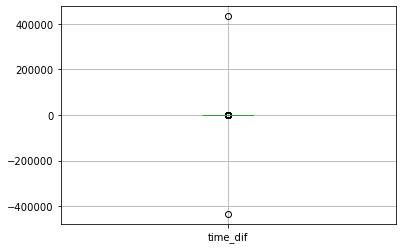

In [99]:
df1[['session', 'time_dif']].boxplot(column=['time_dif'])

In [68]:
df1.loc[(df1['click_fact'] != 0) & (df1['session'] == 1)]

,user_id,session,action_type,key_code,down,up,time,x,y,click_fact
33,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,741.0,345.0,1
64,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,752.0,420.0,1
94,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,760.0,498.0,1
141,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,791.0,177.0,1
262,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,810.0,183.0,1
299,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,795.0,275.0,1
327,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,851.0,371.0,1
331,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,845.0,365.0,1
365,89270693456,1,cursor,NaN,NaN,NaN,1.606151e+12,900.0,427.0,1


Text(0.5, 1.0, 'Траектория курсора 1')

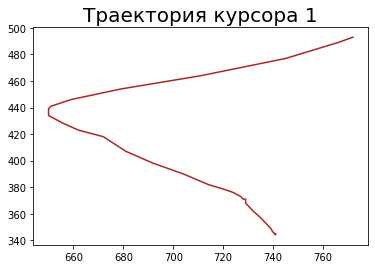

In [80]:
x1 = df1.x[:34]
y1 = df1.y[:34]

plt.plot(x1, y1, 'firebrick')
plt.title("Траектория курсора 1", fontsize=20)
#plt.savefig('эксперимент_2_mouse_d.png')

Text(0.5, 1.0, 'Траектория курсора 2')

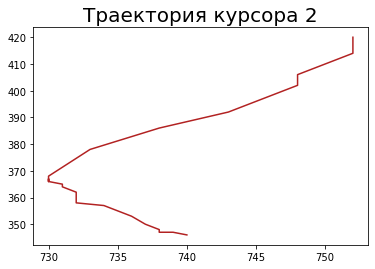

In [81]:
x2 = df1.x[34:65]
y2 = df1.y[34:65]

plt.plot(x2, y2, 'firebrick')
plt.title("Траектория курсора 2", fontsize=20)
#plt.savefig('эксперимент_2_mouse_d.png')